# Support Vector Machines

In [5]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# download data
# wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2024-01-13 13:05:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19,51K  --.-KB/s    in 0,008s  

2024-01-13 13:05:27 (2,29 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



- The ID field contains the patient identifiers.
- The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
- The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [4]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
550,1287971,3,1,1,1,2,1,2,1,1,2
276,434518,3,1,1,1,2,1,2,1,1,2
565,1331412,5,7,10,10,5,10,10,10,1,4
553,1306339,4,4,2,1,2,5,2,1,2,2
497,1182404,4,2,1,1,2,1,1,1,1,2


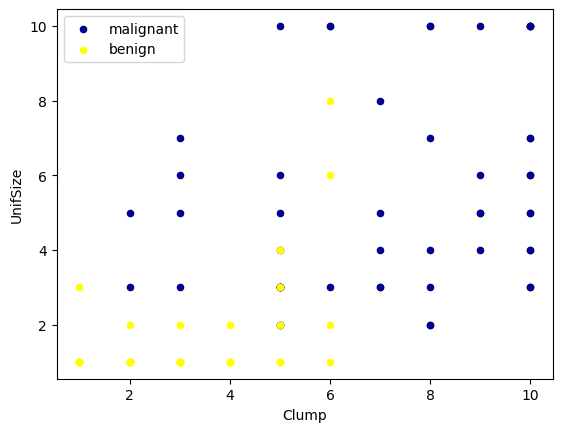

In [6]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

Mapping data into a higher dimensional space is called kernelling.
Kernel functions:
- Linear
- Polynomial
- Sigmoid
- Radial basis function (RBF)

Adventages:
    - memory efficient: uses a subset of training points in the decision function (subset: support vectors)
    - accurate in high dimensional space

Disadventages:
    - Prone to over-fitting (if the number of features is much greater than the number of samples)
    - small dataset (<1000 rows)
    - no probability estimation
    - longer training time duration

- Image recognition
- Text category assigment
- Bioinformatic data (Gene expression classifition etc.)
- Spam detection
- Medical dataset

## Data pre-processing and selection

In [7]:
cell_df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
368,342245,1,1,3,1,2,1,1,1,1,2
287,535331,3,1,1,1,3,1,2,1,1,2
199,1214556,3,1,1,1,2,1,2,1,1,2
300,635844,8,4,10,5,4,4,7,10,1,4
281,486662,2,1,1,2,2,1,3,1,1,2


In [8]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [9]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [10]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

In [12]:
X[0:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]])

In [14]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

In [15]:
y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

## Train/test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [17]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Modeling
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [18]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [20]:
yhat = clf.predict(X_test)
yhat[0:10]

array([4, 4, 4, 4, 4, 4, 2, 2, 4, 4])

# Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay